# Plot time series of a variable at a location

Here we extract and analyze time series data of selected variables at selected sites.

If data is already downloaded to local directories, we load the data, otherwise we extract data from eReef's AIMS THREDDS server.

Extracted data, plotted figures and results of best fit are stored to local directories

Required functions:
* *form_date_strs.py*
* *find_line_of_best_fit.py*

## Specifications

To change name of variable for investifation change the `var_name` variable

Directory for storing or extracting data and results is specified by the `dir_loc` variable

In [23]:
# import libraries
import numpy as np
import pandas as pd
import xarray as xr

import scipy.stats

import matplotlib.pyplot as plt

import os

from form_date_strs import form_date_strs
from find_line_of_best_fit import find_line_of_best_fit

In [24]:
# Location of data source

loc_hydro_daily_monthly = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/ereefs/gbr4_v4/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v4_hydro_daily-monthly-"

loc_bio_monthly_all = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/GBR4_H2p0_B3p1_Cq3b_Dhnd/monthly.nc"
loc_bio_monthly_monthly = 'https://thredds.ereefs.aims.gov.au/thredds/dodsC/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/monthly-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_monthly-monthly-'
loc_bio_daily_monthly = 'https://thredds.ereefs.aims.gov.au/thredds/dodsC/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-'

loc_bio_yearly_all = 'https://thredds.ereefs.aims.gov.au/thredds/dodsC/GBR4_H2p0_B3p1_Cq3b_Dhnd/annual.nc'

In [25]:
# Specify data source

#file_name_common = loc_bio_daily_monthly
#combine_file = True

filename_common = loc_bio_monthly_all
combine_file = False

In [26]:
# Form list of file names

if combine_file == True:

    # need to combine multiple files

    # Define time period
    month = 12
    year = 2010
    no_of_month = 2

    # form corresponding date string list
    date_strs = form_date_strs(year, month, no_of_month)

    # form file name list
    file_names = []
    for datestr in date_strs:
        filename = filename_common + datestr + '.nc'
        file_names.append(filename)

else:
    # if all data are contained within one file
    file_names = [filename_common]

In [27]:
#file_names

In [28]:
#len(file_names)

In [29]:
# access file with xarray
ds = xr.open_mfdataset(file_names)

In [31]:
ds.coords

Coordinates:
    zc         (k) float64 136B dask.array<chunksize=(17,), meta=np.ndarray>
  * latitude   (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude  (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 808B 2010-11-30T14:00:00 ... 2019-03-31T...

In [32]:
ds['time'][[0,1, -1]].values

array(['2010-11-30T14:00:00.000000000', '2010-12-31T14:00:00.000000000',
       '2019-03-31T14:00:00.000000000'], dtype='datetime64[ns]')

In [33]:
ds['time'].shape

(101,)

In [34]:
#ds.data_vars

## Selecting a variable

In [35]:
# Define variable name
var_name = 'DIN'

# Extract data of the variable
var_da = ds[var_name]

# Get some information of the variable
print('Variable long name: ', ds[var_name].long_name)
print('Variable unit: ', ds[var_name].units)
print('Variable current shape: ', ds[var_name].shape)

# Display information of the variable
ds[var_name]

Variable long name:  Dissolved Inorganic Nitrogen
Variable unit:  mg N m-3
Variable current shape:  (101, 17, 723, 491)


<xarray.DataArray 'DIN' (time: 101, k: 17, latitude: 723, longitude: 491)> Size: 2GB
dask.array<open_dataset-DIN, shape=(101, 17, 723, 491), dtype=float32, chunksize=(101, 17, 723, 491), chunktype=numpy.ndarray>
Coordinates:
    zc         (k) float64 136B dask.array<chunksize=(17,), meta=np.ndarray>
  * latitude   (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude  (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 808B 2010-11-30T14:00:00 ... 2019-03-31T...
Dimensions without coordinates: k
Attributes:
    short_name:   DIN
    aggregation:  Monthly
    units:        mg N m-3
    long_name:    Dissolved Inorganic Nitrogen
    _ChunkSizes:  [  1   1 133 491]

## Define time range and extract time

In [36]:
# Define time slice
time_slice = slice('2010-01-01', '2018-12-31')

# extract time
var_time = var_da['time'].sel(time=time_slice).load()

#var_time

## Specify Study Sites

In [67]:
# Define site names and lon lat indices
sites_name = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
sites_lon_idx = [130, 133, 136, 139, 140, 138, 137, 134]
sites_lat_idx = [348, 345, 340, 341, 344, 346, 350, 349]

In [68]:
# Alternatively, load site info from stored file
#df_sites_info = pd.read_csv('sites.csv')
#df_sites_info

#sites_name = df_sites_info['site_name']
#sites_lon_idx = df_sites_info['lon_idx']
#sites_lat_idx = df_sites_info['lat_idx']

In [69]:
#sites_name

In [70]:
#print(sites_lon_idx)
#print(sites_lat_idx)

## Extract or load data


In [41]:
# Define location for storing plots and data 
dir_loc = 'result-'+var_da.short_name+'/'

In [42]:
# Create storage folder if it does not exist
if not os.path.exists(dir_loc):
    flg_new = True
    os.makedirs(dir_loc)
else:
    flg_new = False

In [43]:
# File name for extracting or storing data
file_name_raw_data = dir_loc+'raw-data-'+var_name+'-monthly'+'.csv'

In [44]:
# Chech if we need to extract data from THREDD server
if flg_new == True:

     # data does not exist; need to extract it from server

     # Define storage dict for storing data
     sites_raw_data = {}
     sites_raw_data['time'] = var_time

     # iteratively retrive and store data for each site
     for i in range(len(sites_name)):
          site_name = sites_name[i]
          lon_idx = sites_lon_idx[i]
          lat_idx = sites_lat_idx[i]
          var_da_load = ds[var_name].isel(longitude=lon_idx, latitude=lat_idx, k=-1).sel(time=time_slice).load()
          sites_raw_data[site_name] = var_da_load

     # convert storage dict to pandas DataFrame
     df_sites_raw_data = pd.DataFrame(sites_raw_data)

     # save data to a csv file
     df_sites_raw_data.to_csv(file_name_raw_data, index=False)

else:
     # data exists, need to load it from file_names

     # read data from csv file
     df_sites_raw_data = pd.read_csv(file_name_raw_data)



## Calculate average values across region (GBR)

In [45]:
# Calculate regional average
var_region_avg = var_da.isel(k=-1).sel(time=time_slice).mean(dim=['longitude', 'latitude']).load()

In [46]:
# store global average
if flg_new == True:
     sites_raw_data['GBR_avg'] = var_region_avg

In [47]:
# Find line of best fit of regional average
time_indices = np.arange(var_region_avg['time'].size)
reg_result = scipy.stats.linregress(time_indices, var_region_avg)
poly = [reg_result[0], reg_result[1]]
val_fit = np.polyval(poly, time_indices)

fit_region_avg = {'site': 'GBR_avg',
                 'm': reg_result[0],
                 'b': reg_result[1],
                 'r': reg_result[2],
                 'p_value': reg_result[3]}

## Plotting at a single location

In [48]:
# Select a study site
i = 0
site_name = sites_name[i]
lon_idx = sites_lon_idx[i]
lat_idx = sites_lat_idx[i]

In [49]:
# Load data at selected site
var_da_load = var_da.isel(longitude = lon_idx, latitude = lat_idx, k=-1).sel(time=time_slice).load()

### Original data, resampled mean, rolling mean

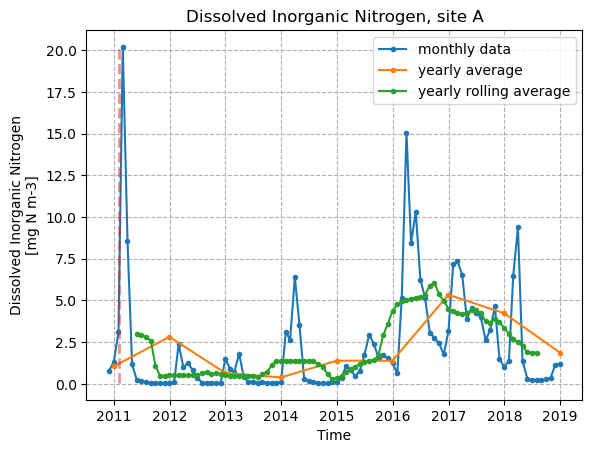

In [50]:
# Define figure and axis
fig, ax = plt.subplots()

# Plot the data
var_da_load.plot(ax=ax, marker='.', label='monthly data')
var_da_load.resample(time='1YE', closed='right').mean().plot(ax=ax, marker='.', label='yearly average')
var_da_load.rolling({'time':12}, center=True).mean().plot(ax=ax, marker='.', label='yearly rolling average')


# Add vertical line representing cyclone time_yasi
time_yasi = pd.to_datetime('2011-02-03')
ax.plot([time_yasi, time_yasi], [var_da_load.min(), var_da_load.max()], linestyle='--', linewidth=2, alpha=0.5)


# Format figure
ax.legend(loc='best')
ax.set_title(var_da_load.long_name + ', site ' +site_name)
ax.grid(linestyle='--')

# save figure
fig.savefig(dir_loc+'fig-'+var_da_load.short_name+'-site-'+site_name+'-moving_mean'+'.png')

In [51]:
#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')#time_yasi = pd.to_datetime('2010-02-03')

### Original data, line of best fit

r:  0.17552671724186505
p value: 0.08384848133465901
fitted equation: y = 0.020 x + 1.248


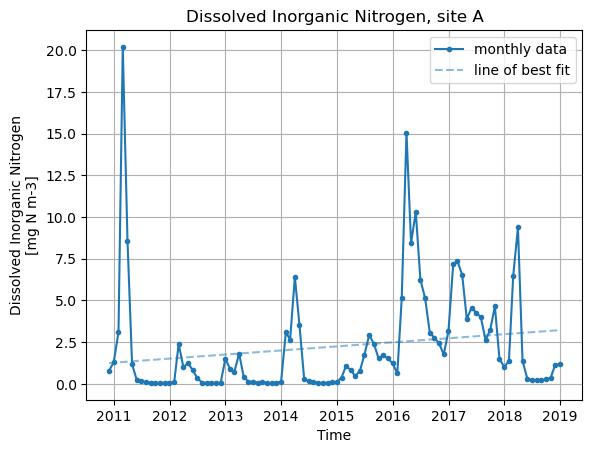

In [52]:
# Define figure and axis
fig, ax = plt.subplots()

# Plot the data
var_da_load.plot(ax=ax, marker='.', label='monthly data')

# Find line of best fit
time_indices = np.arange(var_da_load['time'].size)
reg_result = scipy.stats.linregress(time_indices, var_da_load.values)
poly = (reg_result[0], reg_result[1])
r = reg_result[2]
p_value = reg_result[3]

# Some results from line of best fit
print('r: ', r)
print('p value:', p_value)
print('fitted equation: '+'y = {0:.3f} x + {1:.3f}'.format(poly[0], poly[1]))

# Plot line of best fit
ax.plot(var_da_load['time'], np.polyval(poly, time_indices),
         color='C0', linestyle='--', alpha=0.5, label='line of best fit')

# Add legend
ax.legend()

# Set title 
ax.set_title(var_da.long_name + ', site ' + site_name)

# Add grid
ax.grid()

# save figure
#fig.savefig(dir_loc+'fig-'+var_da_load.short_name+'-site-'+site_name+'-with-best-fit'+'.png')

### Plotting original data together with regional average

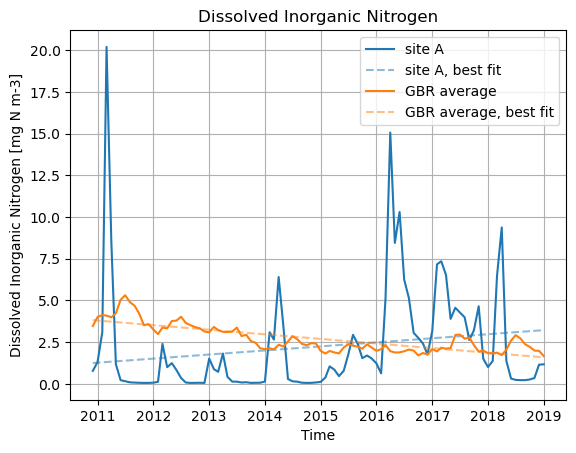

In [53]:
# Define figure and axis
fig, ax = plt.subplots()

# Plot original data
var_da_load.plot(ax=ax, color='C0', label='site '+site_name)

# Find line of best fit
time_indices = np.arange(var_da_load['time'].size)
reg_result = scipy.stats.linregress(time_indices, var_da_load)
poly = [reg_result[0], reg_result[1]]
val_fit = np.polyval(poly, time_indices)

# Plot line of best fit
ax.plot(var_da_load['time'], val_fit,
        linestyle='--', color='tab:blue', alpha=0.5,
        label='site '+site_name+', best fit')



# Plot regional mean
var_region_avg.plot(ax=ax, label='GBR average', color='C1')

# Find line of best fit
time_indices = np.arange(var_region_avg['time'].size)
reg_result = scipy.stats.linregress(time_indices, var_region_avg)
poly = [reg_result[0], reg_result[1]]
val_fit = np.polyval(poly, time_indices)

# Plot line of best fit
ax.plot(var_region_avg['time'], val_fit,
        linestyle='--', color='tab:orange', alpha=0.5,
        label='GBR average, best fit')



# Plot local mean
#var_local_avg.plot(ax=ax, label='local average', color='C2')

# Find line of best fit
#time_indices = np.arange(var_local_avg['time'].size)
#reg_result = scipy.stats.linregress(time_indices, var_local_avg)
#poly = [reg_result[0], reg_result[1]]
#val_fit = np.polyval(poly, time_indices)

# Plot line of best fit
#ax.plot(var_local_avg['time'], val_fit, linestyle='--', color='C2', alpha=0.5, label='local average, best fit')


# Format plot
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel(var_da.long_name + ' [' + var_da.units+']')
ax.set_title(var_da.long_name)
ax.legend()

# Save figure
fig.savefig(dir_loc+'fig-'+var_da_load.short_name+'-site-'+site_name+'-with-GBR-avg'+'.png')

## Find location of extrema

In [54]:
# Finding location of maximum in data
#var_gb = var_da_load.groupby('time.year')

#var_gb_max = var_gb.max

#for var_max in var_gb_max:
    


## Plotting over a range of sites

### Time series at selected sites

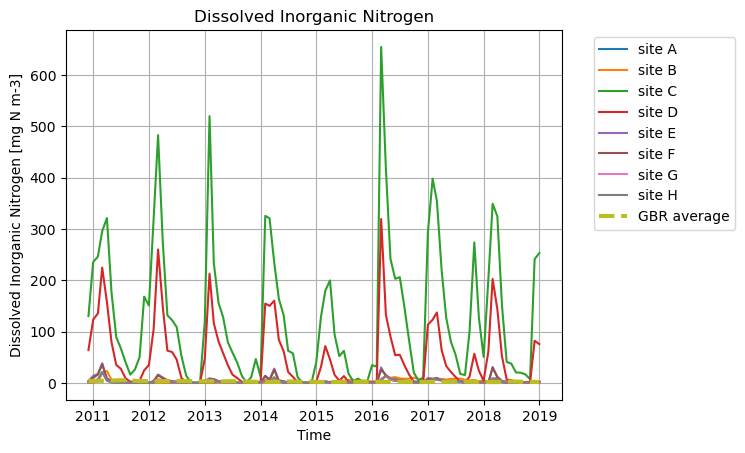

In [55]:
# Plot time series for the study sites

# Define figure and axis
fig, ax = plt.subplots()

# Plot time series for each study site
for i in range(len(sites_name)):
    lon_idx = sites_lon_idx[i]
    lat_idx = sites_lat_idx[i]
    site_name = sites_name[i]
    #var_da_load = ds[var_name].isel(longitude=lon_idx, latitude=lat_idx, k=-1).sel(time=time_slice).load()
    #var_da_load.plot(ax=ax, label = 'site '+site_name)
    var_da_load = df_sites_raw_data[site_name]
    ax.plot(var_time, var_da_load, label='site '+site_name)

# Also plot regional average
ax.plot(var_time, var_region_avg, linestyle='--', linewidth=3, label = 'GBR average')

# Format plot
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Time')
ax.set_ylabel(var_da.long_name + ' [' + var_da.units+']')
ax.set_title(ds[var_name].long_name)
#plt.tight_layout()

# Save figure
fig.savefig(dir_loc+'fig-'+var_name+'-sites-all'+'-time-series'+'-monthly'+'.png',
            bbox_inches='tight')

### Find line of best fit for sites, store fit result, and plot line of best fit

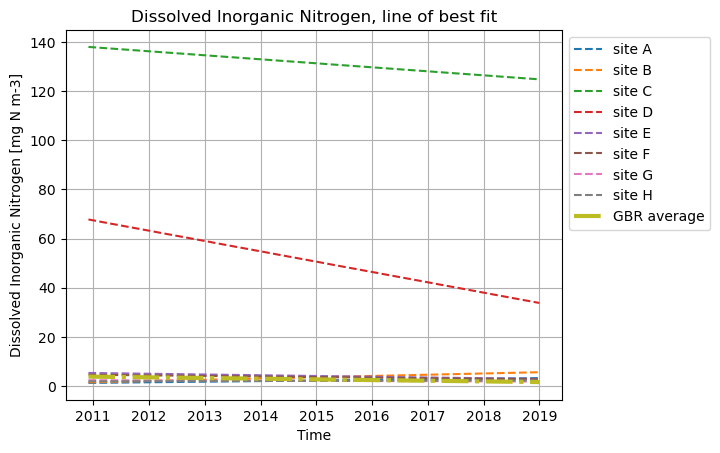

In [56]:
# Obtain and plot line of best fit for study sites

# List to store results from line of best fit 
fit_results = []
fit_results.append(fit_region_avg)

# Define figure and axis
fig, ax = plt.subplots() 

# Find and plot line of best fit for each site
for i in range(len(range(len(sites_name)))):
    
    # load site info
    lon_idx = sites_lon_idx[i]
    lat_idx = sites_lat_idx[i]   
    site_name = sites_name[i]
    
    # load site data
    #var_da_load = ds[var_name].isel(longitude=lon_idx, latitude=lat_idx, k=-1).load()
    var_da_load = sites_raw_data[site_name]
    
    # find line of best fit
    y_fit, poly, r, p_value = find_line_of_best_fit(var_time, var_da_load, True)
    ax.plot(var_time, y_fit, linestyle='--', label = 'site '+site_name)

    # 
    fit_result = {'site': site_name,
                 'm': poly[0],
                 'b': poly[1],
                 'r': r,
                 'p_value': p_value}
    
    fit_results.append(fit_result)

# also plot regional average
y_fit = find_line_of_best_fit(var_time, var_region_avg, False)
ax.plot(var_time, y_fit, linestyle='-.', linewidth=3, label='GBR average')
    

# Format plot
ax.set_xlabel('Time')
ax.set_ylabel(var_da.long_name + ' [' + var_da.units + ']')
ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
ax.grid()
ax.set_title(var_da.long_name + ', line of best fit')

# Save figure
fig.savefig(dir_loc+'fig-'+var_name+'-sites-all'+'-best-fit'+'.png',
            bbox_inches='tight')

In [58]:
# save line of best fit results
df_fit_results = pd.DataFrame(fit_results)
df_fit_results.to_csv(dir_loc+'fit-result-'+var_name+'.csv', index=False)

### Rolling average

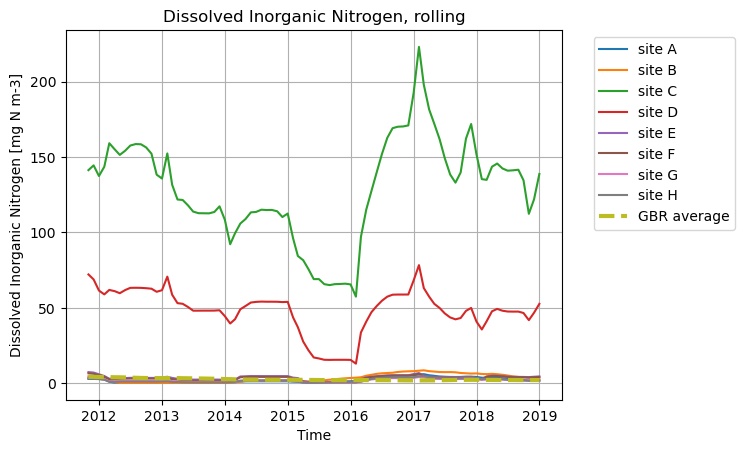

In [59]:
# Plot rolling average

# Define figure and axis
fig, ax = plt.subplots()

# for each site, extract data, form and plot rolling mean
for i in range(len(sites_name)):
    lon_idx = sites_lon_idx[i]
    lat_idx = sites_lat_idx[i]
    site_name = sites_name[i]
    #ds[var_name].isel(longitude = lon_idx, latitude = lat_idx, k=-1, time=slice(None, None)).rolling(time=12).mean().plot(ax=ax, 
    #    marker='.', label = 'site '+site_name)
    var_da_load = df_sites_raw_data[site_name]
    ax.plot(var_time, var_da_load.rolling(12).mean(),
            marker='', label = 'site '+site_name)

# also plot rolling mean for regional average
ax.plot(var_time, pd.Series(var_region_avg).rolling(12).mean(),
        linestyle='--', linewidth=3, label='GBR average')

# format plot
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Time')
ax.set_ylabel(var_da.long_name + ' [' + var_da.units + ']')
ax.set_title(ds[var_name].long_name+', rolling')

# save figure
fig.savefig(dir_loc+'fig-'+var_name+'-sites-all'+'-rolling'+'.png',
            bbox_inches='tight')

In [48]:
#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])#print([s for s in dir(var_da) if not s.startswith('_')])

In [49]:
#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()#var_da.isel(longitude=[1,3,5], latitude=[2,10], k=-1, time=[0]).load()